# Week 6: Homework 2 

----------------------------------------------------
Machine Learning                      

Year 2019/2020

*Vanessa Gómez Verdejo vanessa@tsc.uc3m.es* 

----------------------------------------------------

#1. Introduction to ensembles

The goal of ensemble learning is to combine a set of base learners to build an improved prediction model. The key idea  behind ensembles lies in exploiting the diversity among the base learners; the way of generating this diversity let us classify these methods into two main types:

* **Bagging**: the diversity  among classifiers is generated using different partitions of the training data.
* **Boosting**: it sequentially train a set of weak classifiers using modified versions of the data.

We have already seen a kind of these methods: *Random Forests (RF)*. Remember that RF train a set of trees, each tree use a different subset of samples and features, and later combine their outputs. So, we can say that RF is a Bagging method. 


# 2. Bagging: Boostrap Aggregating

A bagging ensemble combines a set of classiffiers where each base learner is trained with a bagged subset of the training samples. This bagging subsampling consist in randomly, and with replacement,  choosing multiple random samples from the original training data. 

Once the set of base learners is trained, the final ensemble output is obtained by averaging all learner's outputs. In the classification case, usually a majority vote is applied.

<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Ensembles/Bagging.png" width="48%" > 


(*) Figure from https://medium.com/@rrfd/boosting-bagging-and-stacking-ensemble-methods-with-sklearn-and-mlens-a455c0c982de


**References**

L. Breiman, “Bagging predictors”, Machine Learning, 24(2), 123-140, 1996.




# 3. Boosting: Real Adaboost

Boosting methods train a sequence of weak classifiers with weighted or emphasized versions of the training data. Each one of these classifiers is weak since its error rate can be only slightly better than random guessing. Finally, to obtain the final ensemble output, the predictions from all of them are then combined through a weighted combination of all learners' outputs.


The most popular boosting algorithm is called **AdaBoost** (Adaptive Boosting). This boosting method trains this sequence of weak classifiers in such way that each new classifier pay more attention to samples missclassified by the previous learners. Versions of this algorithm are:
* AdaBoost.M1 or  “Discrete AdaBoost” where base learners outputs are discrete estimations of the output class.
* “Real AdaBoost”, in this case, base classifier return a real-valued prediction (e.g., a probability mapped to the interval [−1,1]).

Let's now go deeper in the working principles of the **Real AdaBoost** algorithm.

**References**

* Schapire, R.E. The strength of weak learnability. Machine Learning, 5(2): 1651-1686, 1990.

* Freund, Y. and Schapire, R.E. Experiments with a new boosting algorithm. Proc. of the 13th International Conference on Machine Learning. pp. 148-156, 1996.


## Real Adaboost
Consider we have a binary classification problem given by training dataset $S$ consisting  of $N$ pairs $(\mathbf{x}^{(i)},y^{(i)})$, where $\mathbf{x}^{(i)}\in\mathbb{R}^L$ is the $i$-th observation and $y^{(i)}\in\{-1,1\}$  is its associated label.

Real Adaboost (RA) sequentially trains a set of $T$ learners where each learner implements a prediction function $o_t(x) \in [-1,1]$. To learn this prediction function each learner observes the overall training dataset $S$, but an emphasis function $D_t(\mathbf{x})$ is used during its training to make the learner pay more attention to most erroneous samples.
Finally, the ensemble output is obtained as an averaged weighted sum of all learner output:

$$ f_T({\bf x}) = \displaystyle \sum_{t=1}^T \alpha_t o_t({\bf x})$$

<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Ensembles/boosting.jpg" width="30%" > 



* **Emphasis function**:
To force diversity among the base learners, by means of an emphasis function RA applies weights  to each of the training observations. Initially all weights are equal:
$$ D_{1}({\bf x}^{(i)}) = \frac{1}{N}   $$

  so that the first learner is trained in the usual manner. For next iterations,  $t = 2,3,\ldots,T$, the emphasis function updated with the following rule:

$$ D_{t+1}({\bf x}^{(i)}) = \frac{D_{t}({\bf x}^{(i)}) \exp \left( - \alpha_t o_t({\bf x}^{(i)}) {y}^{(i)} \right)}{Z_t}   $$

  where $Z_t$ is a normalization constant making $\sum_{i=1}^N D_{t+1}({\bf x}^{(i)})  = 1$. Note that this update rule increase the emphasis weight for those observations that were misclassified by the previous classifiers, whereas the weights are decreased for those that were  correctly classified. Thus, as new learners are added to the ensemble, most erroneous samples will receive an increased attention.

* **Output weights ($\alpha_t$)**

To obtain the output weights, RA minimizes the exponential loss function:
$${\bf \alpha}^* =\displaystyle \underset{{\bf \alpha}}{\operatorname{min}} \sum_{i=1}^N \exp \left( - \sum_{t=1}^T \alpha_t o_t({\bf x}^{(i)}) {y}^{(i)} \right) = \displaystyle \underset{{\bf \alpha}}{\operatorname{min}} \sum_{i=1}^N \exp \left( - f_T({\bf x}^{(i)}) {y}^{(i)} \right)$$

which solution can be analytically computed as

$$\alpha_t = \frac{1}{2} \ln \left( \frac{1+\gamma_t}{1-\gamma_t}\right)$$

where $\gamma_t = \sum_{i=1}^N   D_{t}({\bf x}^{(i)}) o_t({\bf x}^{(i)}) {y}^{(i)} $. The effect of these weights is to give higher influence to the more accurate classifiers in the ensemble. 


**Exponential loss**

This cost function, quite similar to the binomial deviance, is un upper bound of the classification error.


In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

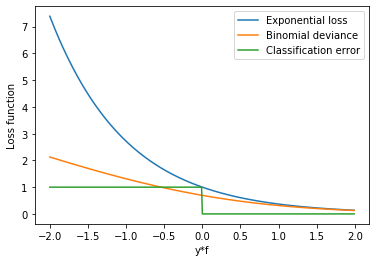

In [48]:
# Plot the exponential loss function (un upper bound of the classfication error)
f = np.arange(-2,2,0.01)
y = 1

l_alpha = np.exp(-y*f)
plt.figure()
plt.plot(y*f,l_alpha, label='Exponential loss')


# Compare with binomial deviance
l_w = np.log(1+ np.exp(f))-y*f
plt.plot(y*f,l_w, label='Binomial deviance')

# Classification error
e_class = np.zeros(f.shape)
e_class[y*f<0] =1
plt.plot(y*f,e_class, label='Classification error')

plt.legend()
plt.xlabel('y*f')
plt.ylabel('Loss function')

plt.show()

# 4. Let's work

The aim of this second HW is to implement and analyse the performance of these enseble methods. To do this, we will work with the Breast Cancer database (described in the next section) and you will have to complete the following exercises.

### Exercise 1. Load and prepare the data

For this lab session, let's work over the  [Breast cancer data set](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) a binary classification problem aimed to detect breast cancer from a  digitized image of breast mass. For this prupose, the images have been preprocesed and characterized with 30 input features describing the mass.

Complete next cell code, so that you can:
* Load the dataset
* Create training and testing partitions with the 60% and 40% of the original data
* Normalize the data to zero mean and unitary standard deviation 

In [148]:
# <SOL>

import numpy as np
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Initialize the random generator seed to compare results
 # si los resultados estan ordenados, como en el caso del irish dataset, los desordenamos usando una semilla aleatoria, para que el modelo entrene con todas las
# diferentes caracteristicas posibles
np.random.seed(0)


# Cargamos los datos

cancer = datasets.load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data,cancer.target,test_size=0.4)



# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"\nVariables de salida \n{breastCancer.target_names}")
print(f"\nLista de caracteristicas del dataset \n{breastCancer.feature_names}")
print(f"\nTamaño del conjunto de datos \n{X.shape,Y.shape}")
print(f"\nTamaño del conjunto de datos de entrenamiento \n{X_train.shape,Y_train.shape}")
print(f"\nTamaño del conjunto de datos de test \n{X_test.shape,Y_test.shape}")
print(f"\nDatos de entrenamiento normalizados \n{X_train}")
print(f"\nDatos de test normalizados \n{X_test}")


# </SOL>


Variables de salida 
['malignant' 'benign']

Lista de caracteristicas del dataset 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Tamaño del conjunto de datos 
((341, 30), (569,))

Tamaño del conjunto de datos de entrenamiento 
((341, 30), (341,))

Tamaño del conjunto de datos de test 
((228, 30), (228,))

Datos de entrenamiento normalizados 
[[-0.84952106  2.37711987 -0.89596908 ... -1.79184446 -2.03197496
  -1.36800648]
 [ 1.56737211  0.66649792  1.52471723 ...  1.88619234 -0.1851911

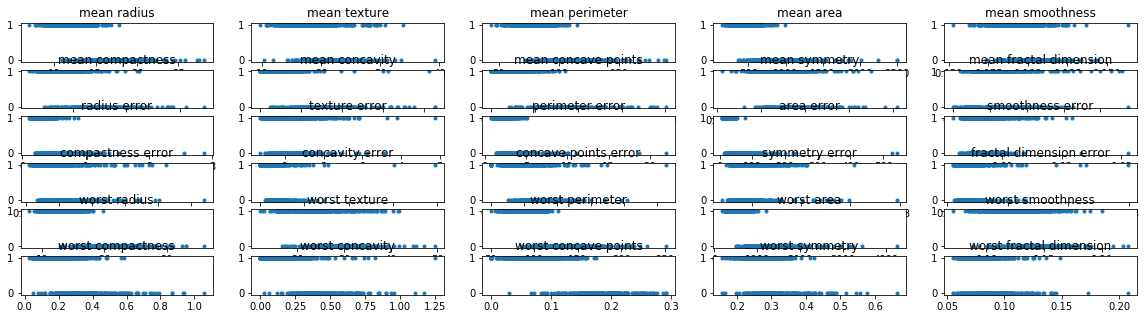

In [150]:
import matplotlib.pyplot as plt
import numpy as np

# cargamos los nombres de las caracteristicas
feature_names = breastCancer.feature_names

# pintamos el numero de evidencias que hay en los datos

D = X.shape[1] # cogemos la segunda posicion de la dimension de la matriz 442

plt.figure( figsize=(20,5))

for d in range (D):
  plt.subplot(6,5,d+1)
  plt.plot(breastCancer.data [:,d],breastCancer.target,'.',)
  plt.title(feature_names[d])

### Exercise 2. Bagging methods


### Exercise 2.1
Complete the following code to desing a function able to train and test a bagged ensemble of $T$ decision trees where each tree have to use a subset of *nperc* of the total number of training samples. Adjust the decision tree parameters so that the maximum depth is fixed to 2 (weak learner).


In [151]:
# ejemplo con el dataset de cancer

import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split



def BaggEnsemble(X_train, Y_train, X_test, y_test, n_estimators,nperc,max_depth, clasificador):
  
  # creamos un clasificador diferente en funcion del parametro que recibamos
  if clasificador=='rf':
    clasif=RandomForestClassifier(max_depth=max_depth)
  elif clasificador=='t':
    clasif=DecisionTreeClassifier(max_depth=max_depth)
  else:
    clasif=DecisionTreeClassifier(max_depth=max_depth)

  clf = BaggingClassifier(clasif,max_samples=0.2,n_estimators=n_estimators, max_features=nperc)
  clf.fit(X_train, Y_train)
  y_pred = clf.predict(X_test)
  acc = clf.score(X_test, y_test)

  print(f" \nNumero de instancias predecidas \n{y_pred.shape}")
  print(f"\nNumero de instancias objetivo \n{y_test.shape}")

  accuracy = accuracy_score(y_test, y_pred)
  print(f" \n Precision Test: \n Valores 'y' predecidos VS. valores 'y' reales \n {accuracy*100}%")
  
  y_pred = clf.predict(X_train)
  accuracy = accuracy_score(Y_train, y_pred)
  print(f" \n Precision Entrenamiento: \n Valores 'y' predecidos VS. valores 'y' reales \n {accuracy*100}%")


  return acc



T=10
nperc = 0.5
max_depth = 1
clasificador='t' # 'rf'

acc = BaggEnsemble(X_train, Y_train, X_test, Y_test, T, nperc, max_depth, clasificador)

#acc = BaggEnsemble(X, y, X_test, y_test, T,nperc,max_depth,clasificador)

print(f"\n Para un numero de {T} estimadores, la preciosion del modelo para los datos de test es del {acc*100}%")

 
Numero de instancias predecidas 
(228,)

Numero de instancias objetivo 
(228,)
 
 Precision Test: 
 Valores 'y' predecidos VS. valores 'y' reales 
 95.6140350877193%
 
 Precision Entrenamiento: 
 Valores 'y' predecidos VS. valores 'y' reales 
 93.841642228739%

 Para un numero de 10 estimadores, la preciosion del modelo para los datos de test es del 95.6140350877193%


In [0]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from scipy import stats


def BaggEnsemble(X_train, Y_train, X_test, Y_test, T, nperc):
  '''
  Train and evaluate a bagged ensemble of decission trees

    Args:
        X_train(numpy dnarray): training (number training data x number dimensions). 
        Y_train (numpy dnarray): labels of the training data (number training data x 1).
        X_test(numpy dnarray): test data to evaluate the ensemble performance (number test data x number dimensions).
        Y_test (numpy dnarray): labels of the test data (number test data x 1).
        T: number of learners in the ensemble  
        nperc: subsampling rate for the bagging process. Value from 0 (none sample is used) to 1 (all samples are used)                                       
   Returns:
        acc_tree_train (numpy dnarray): accuracy over the training data for different number of learners. 
                It's a vector length T, where the t-th element is the ensemble accuracy when only t trees are used.
        acc_tree_test (numpy dnarray): accuracy over the test data for different number of learners. 
                It's a vector length T, where the t-th element is the ensemble accuracy when only t trees are used.
        Y_pred_train (numpy dnarray): predicted outputs over the training data. It's a matrix of dimensions T x number of training samples, 
          where the t-th row has the predicted outputs when t trees are used.
        Y_pred_test (numpy dnarray): predicted outputs over the test data. It's a matrix of dimensions T x number of test samples, 
          where the t-th row has the predicted outputs when t trees are used.

  '''
  # iteramos para el numero de clasificadores
  #for numEstimators in T:
  accuracy = []
  
  clf=BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=T, max_samples=1.0, max_features=nperc, 
                    bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, 
                    random_state=None, verbose=0) 
  
  clf.fit(X_train, Y_train)
  acc_tree_test = clf.score(X_test, Y_test)

  #clf.predict(X_test)
  #acc_tree_train = BaggingClassifier.score(X_train, Y_train)
  #acc_tree_test = clf.score(X_test, Y_test)

  return acc_tree_test

  #return acc_tree_train, acc_tree_test, Y_pred_train, Y_pred_test

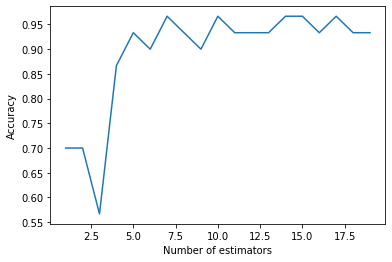

In [77]:
# ejemplo iris

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X, X_test, y, y_test = train_test_split(iris.data,
                                        iris.target,
                                        test_size=0.20)

estimators = list(range(1, 20))
accuracy = []

for n_estimators in estimators:
    clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1),
                            max_samples=0.2,
                            n_estimators=n_estimators)
    clf.fit(X, y)
    acc = clf.score(X_test, y_test)
    accuracy.append(acc)

plt.plot(estimators, accuracy)
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.show()

### Exercise 2.2

Train an ensemble of 40 trees with a subsamplig rate of 50% (T=40 and nperc = 0.5).

In [0]:
# <SOL>



# </SOL>

### Exercise 2.3

Analyze the **diversity** among the base learner' outputs for different *nperc* rates. You can analyze this diversity by measuring the correlation among the learner's soft-outputs. Firstly, obtain the matrix with all pairwaise correlation values (over the training learners' outputs) and, then, compute the ensemble diversity as one minus the averaged value of all pairwise correlation values. Finally, analyze the results.

Some useful functions: [np.corrcoef](https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html)

Note: You can find other ensemble diversity measurements in https://lucykuncheva.co.uk/papers/lkml.pdf

In [0]:
# <SOL>
# </SOL>


### Exercise 2.4

Compare the performace of the bagged ensemble trained in Exercise 2.1 with that of a Random Forest with the same number of learners, and using trees with a maximum depth of 2. Which differences are between both methods? 

Analyze the feature importances provided by the method RandomForestClassifier().


In [0]:
# <SOL>
# </SOL>

In [0]:
# <SOL>
# </SOL>

### Exercise 3.Boosting methods

### Exercise 3.1

Complete the following cell code to desing a funtion able to train a boosting ensemble of $T$ decision trees. Again, fix the maximum depth of the tree to 2.



In [0]:
def RAEnsemble(X_train, Y_train, X_test, Y_test, T):
  '''
  Train and evaluate a bagged ensemble of decission trees

    Args:
        X_train(numpy dnarray): training (number training data x number dimensions). 
        Y_train (numpy dnarray): labels of the training data (number training data x 1).
        X_test(numpy dnarray): test data to evaluate the ensemble performance (number test data x number dimensions).
        Y_test (numpy dnarray): labels of the test data (number test data x 1).
        T: number of learners in the ensemble                                        
   Returns:
        acc_tree_train (numpy dnarray): accuracy over the training data for different number of learners. 
                It's a vector length T, where the t-th element is the ensemble accuracy when only t trees are used.
        acc_tree_test (numpy dnarray): accuracy over the test data for different number of learners. 
                It's a vector length T, where the t-th element is the ensemble accuracy when only t trees are used.
        Y_pred_train (numpy dnarray): predicted outputs over the training data. It's a matrix of dimensions T x number of training samples, 
          where the t-th row has the predicted outputs when t trees are used.
        Y_pred_test (numpy dnarray): predicted outputs over the test data. It's a matrix of dimensions T x number of test samples, 
          where the t-th row has the predicted outputs when t trees are used.
        alpha (numpy dnarray): weight vector of length T with the ouput weights assigned to combine the learner's outputs.
        Dt_all (numpy dnarray): emphasis function used to train each learner. It's a matrix of dimensions T x number of training samples, 
          where the t-th row has the emphasis function used by the t-th learner.

  '''
  
  # <SOL>
  # </SOL>
  return Y_pred_train, Y_pred_test, acc_tree_train, acc_tree_test,  alpha, Dt_all

### Exercise 3.2

Train a Real Adaboost ensemble of 40 trees and analyze the accuracy results over train and test data. Discuss the results. 

Remember that RA learners' output have to provide outputs between $[-1,1]$, so convert the data labels to values $-1$ and $1$ to make this work.

In [0]:
 # <SOL>
 # </SOL>

### Exercise 3.3. 
Finally,  plot the evolution of the emphasis function and the alpha values. Analyze the results.

In [0]:
 # <SOL>
 # </SOL>

# 5. Bias and variance trade-off

Consider that the real model behind our dasaset is given by:

$$Y = f(X) + \epsilon$$

so an observation $x$ is generated from the r.v.  $X$ and, then, it is transformed by a function $f(\cdot)$ and contaminated by an additive gaussian noise $\epsilon$ of zero mean and variance $\sigma_{\epsilon}^2$, to finally generate the target or label value $y$.

When a classifier or estimator is designed from a set of observations and labels, we design a function $\hat{f}(\cdot)$ trying to approximate as well as possible the original funtion $f(\cdot)$. In this case, **the expected squared prediction error** is:

$$ \mathbb{E} \left[ \left(Y−\hat{f}(X)\right)^2\right] = \mathbb{E} \left[ \left({f}(X) + \epsilon −\hat{f}(X)\right)^2\right] =  \left(\mathbb{E} \left[ {f}(X) \right]−\mathbb{E} \left[\hat{f}(X)\right]\right)^2 + \mathbb{E} \left[ \left(\hat{f}(X) − \mathbb{E}\left[ \hat{f}(X)\right]\right)^2\right] +  \sigma_{\epsilon}^2$$

Thus, this error can be decomposed into:
* A squared **bias** term ($\left(\mathbb{E} \left[ {f}(X) \right]−\mathbb{E} \left[\hat{f}(X)\right]\right)^2$): This terms represents the expected  difference between the prediction of the designed model and the value given by the real model. 
* A **variance** term ($\mathbb{E} \left[ \left(\hat{f}(X) − \mathbb{E}\left[ \hat{f}(X)\right]\right)^2\right]$): This term measures the variability of a model prediction.
* The **noise** term. This is the noise term presenting in the generation data model.

Usually, we have a single dataset and we train a unique model, so talking about expected or average prediction values might sounds quite strange. However, to undertand what these expectations are representing, consider that we can generate different training data sets from the distribution of $X$ and, for each data set, we can create a new model. Due to randomness in the underlying data sets, the resulting models will have a range of predictions. So, the bias term measures how far these models' predictions are from the correct value; whereas, the variance measures these predictions (for a given sample) vary between different realizations of the model.



<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Ensembles/Bias_Var.png" width="40%" > 



These  error terms are related to complexity of the model and to the concepts of under-fitting and over-fitting that we reviewed in the previous notebooks:
* Imagine that we have a **complex model**, able to be adjusted to the training data. In this case, different runs of the training data will generate quite different models, presenting a high variability or **high-variance** among them. These models usually present a high risk of **overfitting** and a bad generalizaztion capability.
* Now consider a **simpler model**, that don't tend to overfit, but may **underfit** their training data since it is not able to capture data distribution. Different realizations of this model will present similar predictions, but all of them will be far from the real value to be predicted, presenting a **high bias**.

In an ideal scenario, we would have infinite data to learn our model and we should be able to reduce both the bias and variance terms to 0. However, in a real world, there is a tradeoff between minimizing the bias and minimizing the variance and we can control this with the model complexity. As we increase the model complexity (more parameters are added), we can get to reduce the bias, but the variance is increased.


<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Ensembles/Bias_Var_ModelComplexity.png" width="40%" > 





Check the next cell code where the bias and variance term are computed for a decission tree classifier.

Note that, in this example, we are modeling a noise free problem ($\sigma_{\epsilon}^2=0$). That is, we are considering $Y = f(X)$.


In [59]:
nperc=0.4
niter=100

# Use all data together (we don not nedd test data anymore)
X = np.vstack((X_train,X_test))
Y = np.hstack((Y_train,Y_test))

N = X.shape[0]
Nsub = np.int(nperc*N)

all_f_pred = np.zeros((niter,N))

rang_depth =  np.arange(2,10)

Bias2 = np.zeros((rang_depth.shape[0],N))
Var = np.zeros((rang_depth.shape[0],N))
MSE = np.zeros((rang_depth.shape[0],N))

for d, depth in enumerate(rang_depth):

  clf_tree = tree.DecisionTreeClassifier(max_depth=depth) 
  for i in range(niter):
    # Select some random samples
    samplesid = np.random.choice(N, Nsub, replace=False)
    X_train_sub  = X[samplesid,:]
    Y_train_sub  = Y[samplesid]

    # Train a tree with randomized dataset
    clf_tree.fit(X_train_sub, Y_train_sub)

    # Compute predicted output (overall available data)
    f_pred = clf_tree.predict(X)
    all_f_pred[i,:] = f_pred

  # Mean value of the predicted outputs for each data
  avg_f = np.mean(all_f_pred,axis =0)

  # Obtain the bias^2 of each data
  Bias2[d, :] = (Y - avg_f)**2
  # Obtain the var of each data
  Var[d, :] = np.mean((all_f_pred - avg_f)**2,axis=0)
  # Obtain MSE
  MSE[d,:] = np.mean((Y-all_f_pred)**2,axis=0)


# Print the results averaged over all data
Bias2mean = np.mean(Bias2,axis=1)
Varmean = np.mean(Var,axis=1)
MSEmean = np.mean(MSE,axis=1)

print("The squared Bias term is: ", Bias2mean)
print("The Variance term is: ",Varmean)
print("The MSE is: ",MSEmean)
print("We can check that MSE = Bias^2 + Variance")

plt.figure()
plt.plot(rang_depth, Bias2mean, label='Bias^2')
plt.plot(rang_depth, Varmean, label='Variance')
plt.plot(rang_depth, MSEmean, label='MSE')


plt.legend()
plt.xlabel('depth')
plt.ylabel('MSE')

plt.show()

ValueError: ignored

### Exercise 4. Advanced work: Bias and variance trade off for ensemble methods

Analyze the bias and variance terms evolution with the number of base learners in:
* the bagged ensemble designed in exercise 2.1. 
* the RA ensemble designed in exercise 3.1.

Generate 100 random partitions of training data and you can run the ensemble with only 20 learners. Analyze and discuss the results. 



In [0]:
 # <SOL>
 # </SOL>

In [0]:
 # <SOL>
 # </SOL>

In [0]:
 # <SOL>
 # </SOL>

In [0]:
 # <SOL>
 # </SOL>